In [1]:
# Import libraries
import numpy as np
from sklearn.datasets import load_iris, fetch_openml
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
from sklearn.decomposition import KernelPCA
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, f1_score
import time
import matplotlib.pyplot as plt

In [2]:
# Load datasets
iris = load_iris()
X, y = iris.data, iris.target
mnist = fetch_openml('mnist_784')
X_mnist, y_mnist = mnist.data, mnist.target

# Split MNIST_subset
X_mnist_subset, _, y_mnist_subset, _ = train_test_split(X_mnist, y_mnist, stratify=y_mnist, train_size=0.01, random_state=42)

c:\Users\ibpri\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\datasets\_openml.py:968: FutureWarning: The default value of `parser` will change from `'liac-arff'` to `'auto'` in 1.4. You can set `parser='auto'` to silence this warning. Therefore, an `ImportError` will be raised from 1.4 if the dataset is dense and pandas is not installed. Note that the pandas parser may return different data types. See the Notes Section in fetch_openml's API doc for details.
  warn(


In [3]:
# Define a function to perform dimensionality reduction and classify data
def classify_data(X_train, X_test, y_train, y_test, method, n_components):
    # Apply dimensionality reduction
    if method == 'PCA':
        dr = PCA(n_components=n_components, random_state=42)
    elif method == 'LDA':
        dr = LDA(n_components=n_components)
    elif method == 'KernelPCA':
        dr = KernelPCA(n_components=n_components, kernel='rbf', gamma=0.0001)
    
    X_train_dr = dr.fit_transform(X_train, y_train)
    X_test_dr = dr.transform(X_test)
    
    # Train Decision Tree classifier
    clf = DecisionTreeClassifier(random_state=42)
    start_time = time.time()
    clf.fit(X_train_dr, y_train)
    end_time = time.time()
    
    # Predict and calculate accuracy
    y_pred = clf.predict(X_test_dr)
    accuracy = accuracy_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred, average='macro')
    
    return accuracy, f1, end_time - start_time

PCA (n_components=2) - Iris Accuracy: 0.87 - Iris F1 Score: 0.87 - Iris Time: 0.0010 seconds
PCA (n_components=3) - Iris Accuracy: 0.89 - Iris F1 Score: 0.90 - Iris Time: 0.0021 seconds
PCA (n_components=4) - Iris Accuracy: 0.92 - Iris F1 Score: 0.92 - Iris Time: 0.0010 seconds


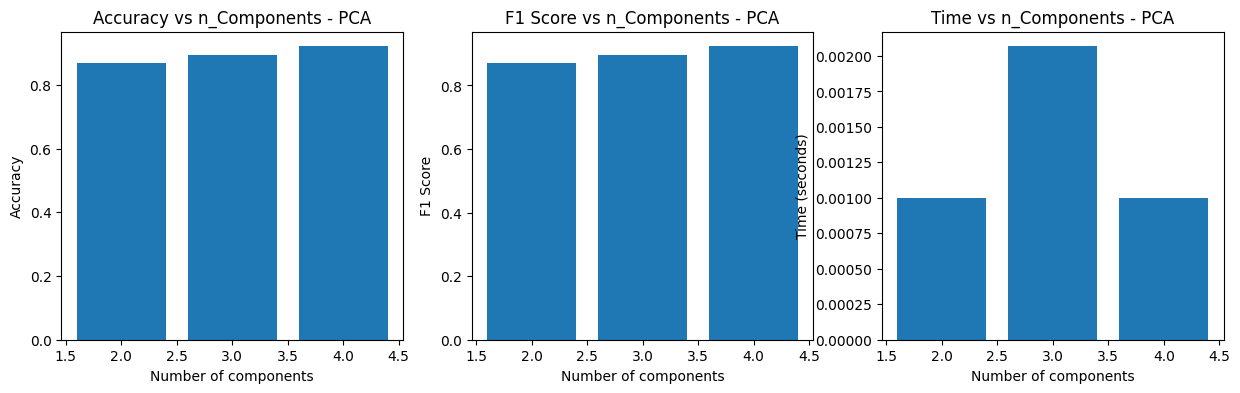



LDA (n_components=2) - Iris Accuracy: 1.00 - Iris F1 Score: 1.00 - Iris Time: 0.0009 seconds


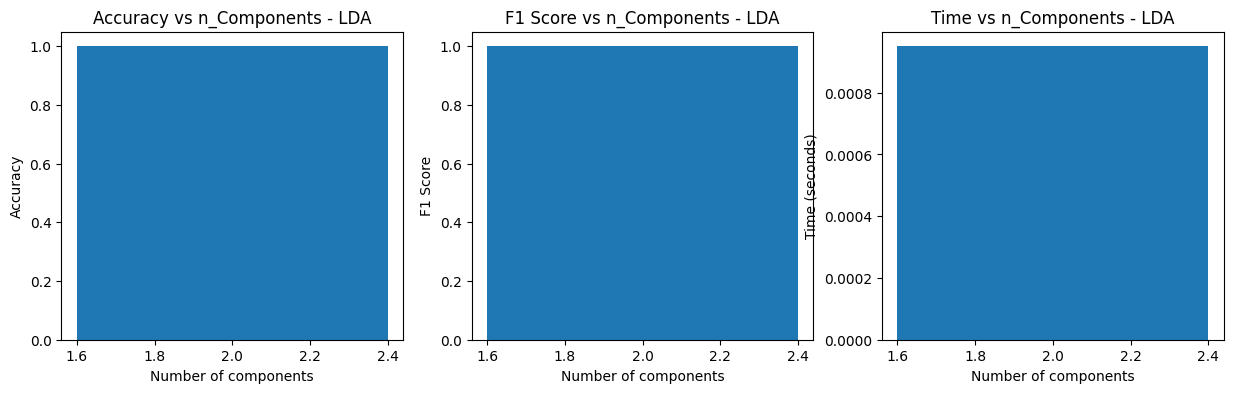



KernelPCA (n_components=2) - Iris Accuracy: 0.87 - Iris F1 Score: 0.87 - Iris Time: 0.0011 seconds
KernelPCA (n_components=3) - Iris Accuracy: 0.89 - Iris F1 Score: 0.90 - Iris Time: 0.0010 seconds
KernelPCA (n_components=4) - Iris Accuracy: 0.92 - Iris F1 Score: 0.92 - Iris Time: 0.0010 seconds


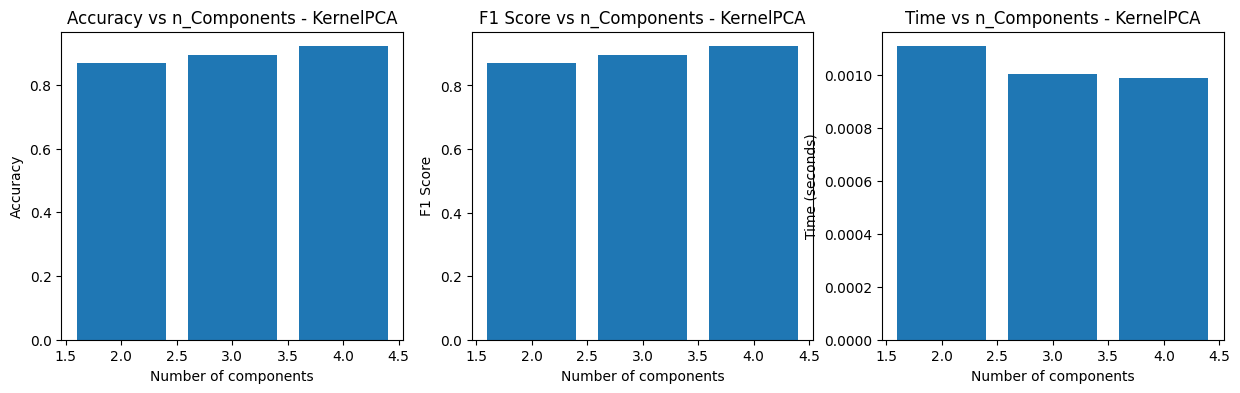

In [17]:
# Initialize variables
methods = ['PCA', 'LDA', 'KernelPCA']
n_components_list = [2, 3, 4]

# Loop through methods and number of components
for method in methods:
    acc, f1, times=[], [], []
    for n_components in n_components_list:
        if method == 'LDA' and n_components > 2:
            continue # LDA only supports 2 components
        
        # Split data into train and test sets
        X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, random_state=42)
        
        # Standardize data
        scaler = StandardScaler()
        X_train_scaled = scaler.fit_transform(X_train)
        X_test_scaled = scaler.transform(X_test)
        
        # Apply dimensionality reduction and classify data
        accuracy_iris, f1_score_iris, time_iris = classify_data(X_train_scaled, X_test_scaled, y_train, y_test, method, n_components)
        acc.append(accuracy_iris)
        f1.append(f1_score_iris)
        times.append(time_iris)

        # Print results
        print(f'{method} (n_components={n_components}) - Iris Accuracy: {accuracy_iris:.2f} - Iris F1 Score: {f1_score_iris:.2f} - Iris Time: {time_iris:.4f} seconds')
    
    # Plot resusts
    if method=='LDA':
        n_comp = [2]
    else:
        n_comp = n_components_list
    fig, ax = plt.subplots(nrows=1, ncols=3, figsize=(15, 4))
    ax[0].bar(n_comp, acc)
    ax[0].set_xlabel('Number of components')
    ax[0].set_ylabel('Accuracy')
    ax[0].set_title('Accuracy vs n_Components'+' - '+method)

    ax[1].bar(n_comp, f1)
    ax[1].set_xlabel('Number of components')
    ax[1].set_ylabel('F1 Score')
    ax[1].set_title('F1 Score vs n_Components'+' - '+method)

    ax[2].bar(n_comp, times)
    ax[2].set_xlabel('Number of components')
    ax[2].set_ylabel('Time (seconds)')
    ax[2].set_title('Time vs n_Components'+' - '+method)
    
    plt.show()
    print("\n")    

PCA (n_components=2) - MNIST Accuracy: 0.28 - MNIST F1 Score: 0.28 - MNIST Time: 0.0029 seconds
PCA (n_components=3) - MNIST Accuracy: 0.46 - MNIST F1 Score: 0.45 - MNIST Time: 0.0030 seconds
PCA (n_components=4) - MNIST Accuracy: 0.45 - MNIST F1 Score: 0.44 - MNIST Time: 0.0030 seconds
PCA (n_components=5) - MNIST Accuracy: 0.53 - MNIST F1 Score: 0.53 - MNIST Time: 0.0030 seconds
PCA (n_components=6) - MNIST Accuracy: 0.59 - MNIST F1 Score: 0.58 - MNIST Time: 0.0039 seconds
PCA (n_components=7) - MNIST Accuracy: 0.57 - MNIST F1 Score: 0.56 - MNIST Time: 0.0040 seconds


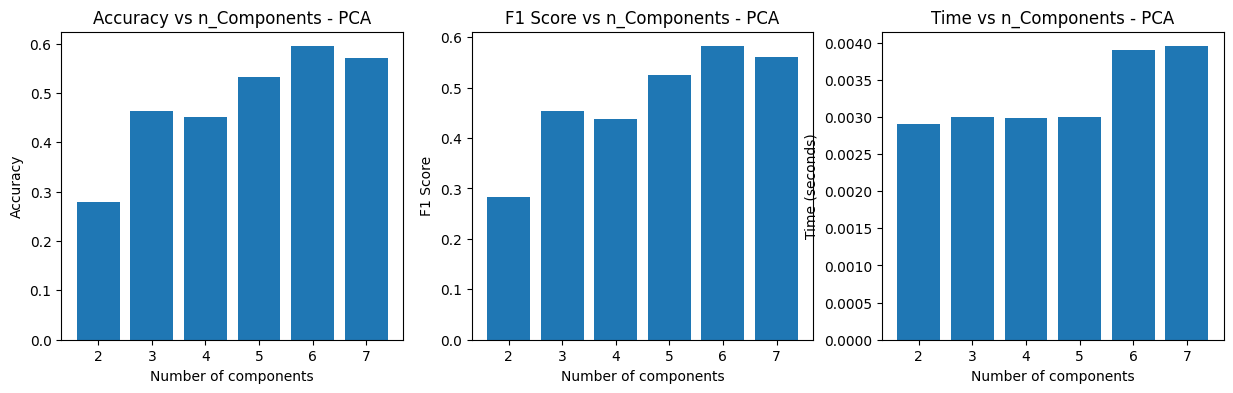



LDA (n_components=2) - MNIST Accuracy: 0.18 - MNIST F1 Score: 0.17 - MNIST Time: 0.0010 seconds
LDA (n_components=3) - MNIST Accuracy: 0.25 - MNIST F1 Score: 0.22 - MNIST Time: 0.0025 seconds
LDA (n_components=4) - MNIST Accuracy: 0.25 - MNIST F1 Score: 0.19 - MNIST Time: 0.0020 seconds
LDA (n_components=5) - MNIST Accuracy: 0.22 - MNIST F1 Score: 0.14 - MNIST Time: 0.0030 seconds
LDA (n_components=6) - MNIST Accuracy: 0.21 - MNIST F1 Score: 0.12 - MNIST Time: 0.0040 seconds
LDA (n_components=7) - MNIST Accuracy: 0.21 - MNIST F1 Score: 0.16 - MNIST Time: 0.0040 seconds


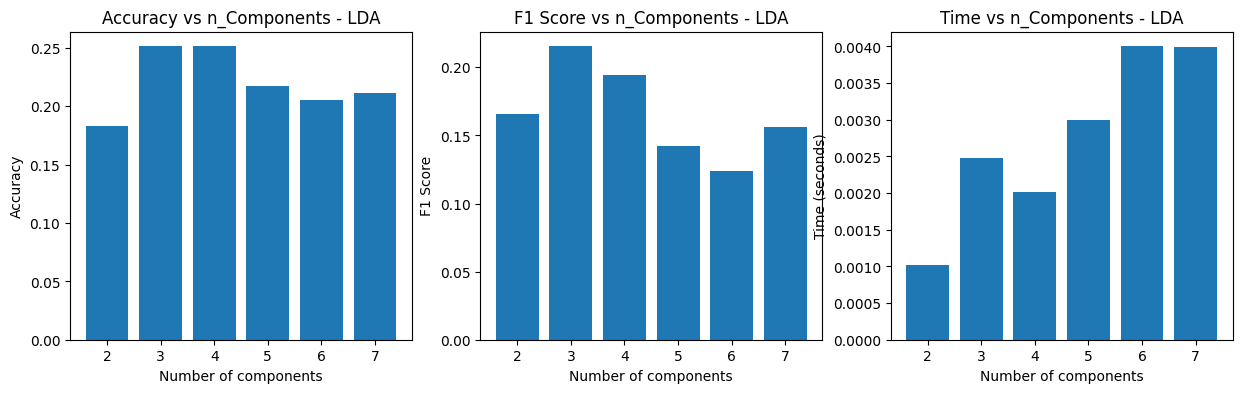



KernelPCA (n_components=2) - MNIST Accuracy: 0.23 - MNIST F1 Score: 0.22 - MNIST Time: 0.0030 seconds
KernelPCA (n_components=3) - MNIST Accuracy: 0.37 - MNIST F1 Score: 0.37 - MNIST Time: 0.0020 seconds
KernelPCA (n_components=4) - MNIST Accuracy: 0.41 - MNIST F1 Score: 0.41 - MNIST Time: 0.0040 seconds
KernelPCA (n_components=5) - MNIST Accuracy: 0.54 - MNIST F1 Score: 0.53 - MNIST Time: 0.0030 seconds
KernelPCA (n_components=6) - MNIST Accuracy: 0.58 - MNIST F1 Score: 0.57 - MNIST Time: 0.0040 seconds
KernelPCA (n_components=7) - MNIST Accuracy: 0.61 - MNIST F1 Score: 0.60 - MNIST Time: 0.0040 seconds


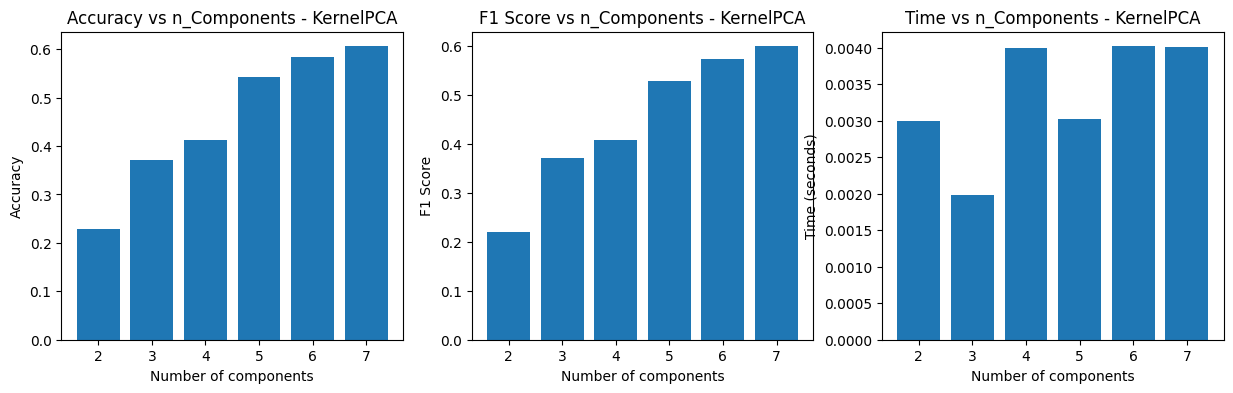

In [18]:
n_components_list = range(2,8)

# Loop through methods and number of components
for method in methods:
    acc, f1, times=[], [], []
    for n_components in n_components_list:
        # Split MNIST_subset into train and test sets
        X_train_mnist, X_test_mnist, y_train_mnist, y_test_mnist = train_test_split(X_mnist_subset, y_mnist_subset, stratify=y_mnist_subset, random_state=42)
        
        # Standardize MNIST_subset data
        scaler_mnist = StandardScaler()
        X_train_mnist_scaled = scaler_mnist.fit_transform(X_train_mnist)
        X_test_mnist_scaled = scaler_mnist.transform(X_test_mnist)
        
        # Apply dimensionality reduction and classify MNIST_subset data
        accuracy_mnist, f1_score_mnist, time_mnist = classify_data(X_train_mnist_scaled, X_test_mnist_scaled, y_train_mnist, y_test_mnist, method, n_components)
        acc.append(accuracy_mnist)
        f1.append(f1_score_mnist)
        times.append(time_mnist)

        # Print results
        print(f'{method} (n_components={n_components}) - MNIST Accuracy: {accuracy_mnist:.2f} - MNIST F1 Score: {f1_score_mnist:.2f} - MNIST Time: {time_mnist:.4f} seconds')
    
    # Plot resusts
    fig, ax = plt.subplots(nrows=1, ncols=3, figsize=(15, 4))
    ax[0].bar(n_components_list, acc)
    ax[0].set_xlabel('Number of components')
    ax[0].set_ylabel('Accuracy')
    ax[0].set_title('Accuracy vs n_Components'+' - '+method)

    ax[1].bar(n_components_list, f1)
    ax[1].set_xlabel('Number of components')
    ax[1].set_ylabel('F1 Score')
    ax[1].set_title('F1 Score vs n_Components'+' - '+method)

    ax[2].bar(n_components_list, times)
    ax[2].set_xlabel('Number of components')
    ax[2].set_ylabel('Time (seconds)')
    ax[2].set_title('Time vs n_Components'+' - '+method)

    plt.show()
    print("\n")    